# **SPAM Classification Project**


Hello everyone! My name is Ignacio Antequera Sanchez and the objective of this project is to create Machine & Deep Learning models that operate at the crossroads of the `NLP` and `Network Security` domains. This will be accomplished by utilizing the `SMS Spam Collection dataset` in conjunction with supporting frameworks and libraries. This project is designed to be executed in accordance with the following steps:

1.  Efficiently explore the SMS Spam Collection dataset and construct optimal models using functional programming and a step-by-step model depiction, aimed at tackling SPAM classification.
2.  Present a range of computed metrics for the constructed models.
3.  Adjust values of certain hyperparameters during the model training process to enhance performance and attain superior outcomes.
4.  Employ diverse types of plots to visualize the outcomes of our data analysis.


## Agenda


*   Data Sourcing and References
*   Implementation
    *   Import required libraries and dataset
    *   Incorporate supplementary  preparatory steps and integrate additional functions.
    *   Reading the Dataset
    *   Dataset manipulations & simple EDA
    *   Dataset size & feature names
    *   Dataset primary statistics
    *   Part A. Advanced Machine Learning for SPAM classification task
    *   Part B. Advanced Deep Learning for SPAM classification task
*   Final Reflection and Comments

***


## DATA SOURCING and REFERENCES


The dataset to be employed for this endeavor is a subset of the open-source `SMS Spam Collection dataset`. This dataset contains examples of SMS text along with their corresponding labels, which are categorized as `Spam` or `Ham`. Each line in the dataset file represents a single message and is comprised of two columns: "v1" indicating the label (`ham` or `spam`), and "v2" containing the raw text of the message.

This corpus has been assembled from freely available or research-oriented sources on the internet:

*   A collection of 425 SMS spam messages was manually extracted from the Grumbletext website, a UK forum where cell phone users publicly discuss SMS spam messages. Identifying spam texts within these claims required meticulous scanning of numerous web pages due to the lack of direct reporting of spam messages. The Grumbletext website can be accessed at the following link: [Grumbletext](http://www.grumbletext.co.uk/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01).
*   A subset of 3,375 randomly selected ham messages from the NUS SMS Corpus (NSC) is included. NSC is a research dataset consisting of around 10,000 legitimate messages gathered from various sources, predominantly Singaporeans and university students. These contributions were made by volunteers aware of the data's public availability. The NUS SMS Corpus is accessible at the provided link: [NUS](http://www.comp.nus.edu.sg/\~rpnlpir/downloads/corpora/smsCorpus/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01).
*   An assortment of 450 SMS ham messages sourced from Caroline Tag's PhD Thesis is also incorporated. The dataset is accessible through the provided web link: [Caroline](http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01).
*   The SMS Spam Corpus v.0.1 Big has been integrated, comprising 1,002 ham messages and 322 spam messages. It is publicly accessible through the link provided: [SMS_Spam](http://www.esp.uem.es/jmgomez/smsspamcorpus/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01).

The original complete dataset can be accessed [here](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01). The creators kindly request that if the dataset proves beneficial, acknowledgment through references to the original paper and webpage be included in any relevant research or publications. Here is the link: [Original](http://www.dt.fee.unicamp.br/\~tiago/smsspamcollection/).

This project entails presenting various statistics, studies, and baseline results for several machine learning methods.

***

Citation: Almeida, T.A., Gómez Hidalgo, J.M., Yamakami, A. "Contributions to the Study of SMS Spam Filtering: New Collection and Results." Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

***

Furthermore, a visualization of the outcomes, particularly the metrics (accuracy and loss), will be constructed to aid in selecting the optimal model for subsequent preservation and prediction based on the saved model.

## IMPLEMENTATION


## Import required libraries and dataset


The main dataset file is accessible through this link: [https://www.kaggle.com/uciml/sms-spam-collection-dataset?select=spam.csv](https://www.kaggle.com/uciml/sms-spam-collection-dataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01&select=spam.csv)


Import and install the necessary libraries to use in this lab.

In [1]:
!pip install --user nltk
!pip install --user wordcloud
!pip install --user tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import nltk, re, collections, pickle, os # nltk - Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# %matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')
seed = 42

# Ignore warnings.
import warnings
warnings.filterwarnings(action = "ignore")
warnings.simplefilter(action = 'ignore', category = Warning)
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nacho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nacho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nacho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nacho\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Incorporate supplementary  preparatory steps and integrate additional functions.


Specify the value of the `precision` parameter equal to 3 to display three decimal signs (instead of 6 as default).


In [3]:
pd.set_option("display.precision", 3)
pd.options.display.float_format = '{:.3f}'.format

Add some functions that we will use in further steps of the project.


In [4]:
def plot_history(history):
    
    # Plots training and validation loss/accuracy over epochs.
    # Visualizes the training and validation performance of the model.
    # Helps to identify overfitting or underfitting.
    
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' in s]
    
    plt.figure(figsize = (12, 5), dpi = 100)
    COLOR = 'gray'
    
    plt.rc('legend', fontsize = 14)   # legend fontsize
    plt.rc('figure', titlesize = 12)  # fontsize of the figure title
        
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1, len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace = 2, hspace = 2)
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.titlecolor'] = 'black'
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b-o',
                 label = 'Train (' + str(str(format(history.history[l][-1],'.4f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g',
                 label = 'Valid (' + str(str(format(history.history[l][-1],'.4f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend(facecolor = 'gray', loc = 'best')
    plt.grid(True)
    plt.tight_layout()
    
    ## Accuracy
    plt.subplot(1, 2, 2)
    plt.subplots_adjust(wspace = 2, hspace = 2)
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.titlecolor'] = 'black'
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b-o',
                 label = 'Train (' + str(format(history.history[l][-1],'.4f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g',
                 label = 'Valid (' + str(format(history.history[l][-1],'.4f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(facecolor = 'gray', loc = 'best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    

def plot_conf_matr(conf_matr, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.winter):
    
  # Plots training and validation loss/accuracy over epochs.
  # Visualizes the training and validation performance of the model.
  # Helps to identify overfitting or underfitting.
  import itertools

  accuracy = np.trace(conf_matr) / np.sum(conf_matr).astype('float')
  sns.set(font_scale = 1.4)

  plt.figure(figsize = (12, 8))
  plt.imshow(conf_matr, interpolation = 'nearest', cmap = cmap)
  title = '\n' + title + '\n'
  plt.title(title)
  plt.colorbar()

  if classes is not None:
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation = 45)
      plt.yticks(tick_marks, classes)

  if normalize:
      conf_matr = conf_matr.astype('float') / conf_matr.sum(axis = 1)[:, np.newaxis]


  thresh = conf_matr.max() / 1.5 if normalize else conf_matr.max() / 2
  for i, j in itertools.product(range(conf_matr.shape[0]), range(conf_matr.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.2f}%".format(conf_matr[i, j] * 100),
                    horizontalalignment = "center",
                    fontweight = 'bold',
                    color = "white" if conf_matr[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(conf_matr[i, j]),
                    horizontalalignment = "center",
                    fontweight = 'bold',
                    color = "white" if conf_matr[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\n\nAccuracy = {:0.2f}%; Error = {:0.2f}%'.format(accuracy * 100, (1 - accuracy) * 100))
  plt.show()


def plot_words(set, number):
    
  # Plots a bar chart showing the most common words in a dataset.
  # Helps to visualize the distribution of words in the dataset.
    
  words_counter = collections.Counter([word for sentence in set for word in sentence.split()]) # finding words along with count
  most_counted = words_counter.most_common(number)
  most_count = pd.DataFrame(most_counted, columns = ["Words", "Amount"]).sort_values(by = "Amount") # sorted data frame
  most_count.plot.barh(x = "Words", 
                       y = "Amount",
                       color = "blue",
                       figsize = (10, 15))
  for i, v in enumerate(most_count["Amount"]):
    plt.text(v, i,
             " " + str(v),
             color = 'black',
             va = 'center',
             fontweight = 'bold')
    
    

def word_cloud(tag):
  
  # Generates and displays a word cloud visualization.
  # Creates a word cloud from a subset of messages in the dataset based on a specified tag.
  # Provides a visual representation of the most frequent words in the messages.

  df_words_nl = ' '.join(list(df_spam[df_spam['feature'] == tag]['message']))
  df_wc_nl = WordCloud(width = 600, height = 512).generate(df_words_nl)
  plt.figure(figsize = (13, 9), facecolor = 'k')
  plt.imshow(df_wc_nl)
  plt.axis('off')
  plt.tight_layout(pad = 1)
  plt.show()

## Reading the Dataset


The files contain one message per line. Each line consists of two columns: v1 contains the label (`ham` or `spam`) and v2 contains the raw text. SMS spam (sometimes called cell phone spam) is any junk message delivered to a mobile phone as a text messaging through the Short Message Service (SMS). The practice is fairly rare in `North America` but has been common in `Japan` for years.

The datasets comprise individual messages arranged in rows, where each row has two columns: v1 holds the classification (`ham` or `spam`), and v2 contains the unprocessed text content. SMS spam, also known as cell phone spam, pertains to unsolicited messages sent to mobile phones via text messages through the Short Message Service (SMS). While not frequently observed in North America nor Europe, this phenomenon has been prevalent in Japan over an extended period.

Read the dataset:

In [5]:
df_spam = pd.read_csv('spam.csv', encoding = 'latin-1')

## Dataset Manipulations & Exploratory Data Analysis

For the sake of enhancing readability, we can rename the columns (v1, v2) respectively.

In [6]:
df_spam = df_spam.filter(['v1', 'v2'], axis = 1)
df_spam.columns = ['feature', 'message']
df_spam.drop_duplicates(inplace = True, ignore_index = True)
print('Number of null values:\n')
df_spam.isnull().sum()

Number of null values:



feature    0
message    0
dtype: int64

Total ham(0) and spam(1) messages.


In [7]:
df_spam['feature'].value_counts()

ham     4516
spam     653
Name: feature, dtype: int64

## Dataset size & feature names


In [8]:
df_spam.shape, df_spam.columns

((5169, 2), Index(['feature', 'message'], dtype='object'))

The dataset contains a lot of objects (rows), including 1 target feature (`feature`) and an additional column (`message`).


Input features (column names):

1.  `feature` - tags in this data collection
2.  `message` - raw test message example


We'll present a transposed description of the data using the `describe` & `T` methods. The count of statistical result parameters is determined by the utilization of the `describe` method on the dataset.

In [9]:
df_spam.describe().T

,count,unique,top,freq
feature,5169,2,ham,4516
message,5169,5169,"Go until jurong point, crazy.. Available only ...",1


## Dataset primary statistics


Let’s plot the number of value of both `spam` and `ham` messages.


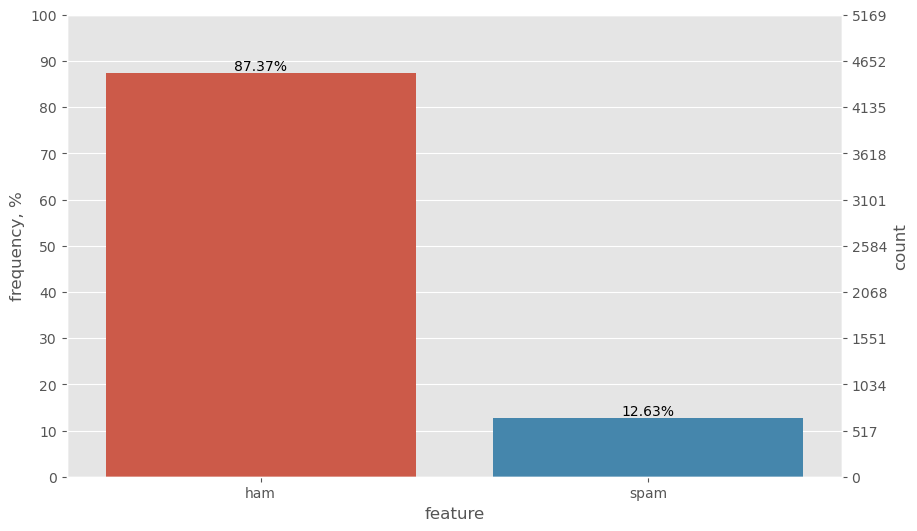

In [10]:
# Set the figure size
plt.figure(figsize = (10, 6))

# Get the total number of messages
counter = df_spam.shape[0]

# Create a count plot for the 'feature' column
ax1 = sns.countplot(df_spam['feature'])

# Create a twin axis (second y-axis) and make double axis
ax2 = ax1.twinx()

# Set tick positions for the dual y-axes
# Switch so the counter's axis is on the right, frequency axis is on the left
ax2.yaxis.tick_left()                 
ax1.yaxis.tick_right()

# Adjust label positions for the dual y-axes and switch the laberls over
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

# Set the label for the second y-axis
ax2.set_ylabel('frequency, %')

# Annotate each bar with the corresponding percentage
for p in ax1.patches:
  x = p.get_bbox().get_points()[:, 0]
  y = p.get_bbox().get_points()[1, 1]
  ax1.annotate('{:.2f}%'.format(100. * y / counter),
              (x.mean(), y),
              ha = 'center',
              va = 'bottom')

# Set the major tick locator and range for the first y-axis
# Use a LinearLocator to ensure the correct number of ticks
ax1.yaxis.set_major_locator(ticker.LinearLocator(11))
ax1.set_ylim(0, counter)

# Set the frequency range and tick spacing for the second y-axis
ax2.set_ylim(0, 100) # Fix the frequency range to 0-100
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10)) # And use a MultipleLocator to ensure a tick spacing of 10

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

The count of `ham` messages is nearly seven times greater than the count of `spam` messages in the dataset.

Let us generate a plot illustrating the frequency distribution or `number` of most commonly used "terms" (which can be identified as words) present within our dataset.

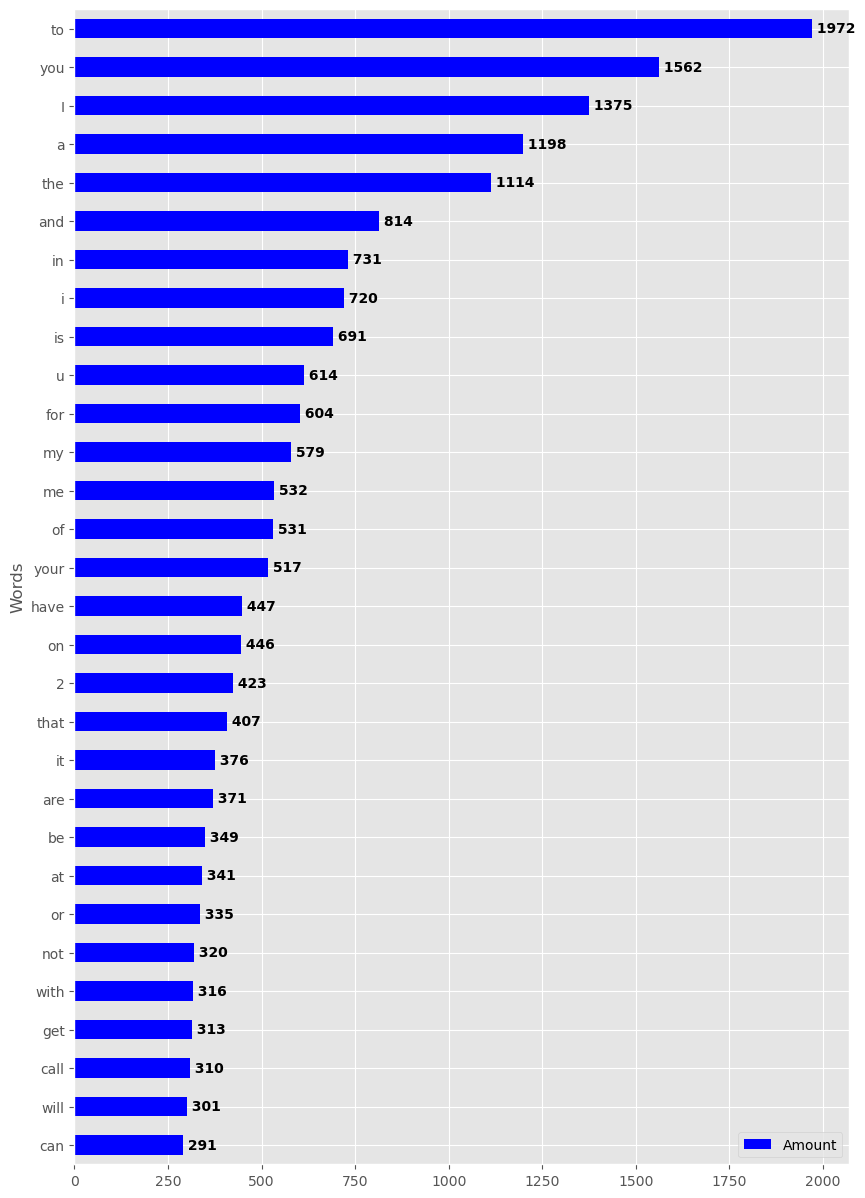

In [11]:
plot_words(df_spam['message'], number = 30)

As evident from the analysis, the frequently occurring terms primarily consist of stopwords. Consequently, it becomes imperative to apply preprocessing techniques to the dataset if we want to get meaningful results.

Lemmatisation, for example, is the process of grouping together the inflected forms of a word so they can be analysed as a single item.

Now, let us build the `WordCloud` image for the `spam` and the existed words (label `ham`) separately. A Word Cloud is an excellent option to help visually interpret text and is useful in quickly gaining insight into the most prominent items in a given text, by visualizing the word frequency in the text as a weighted list.

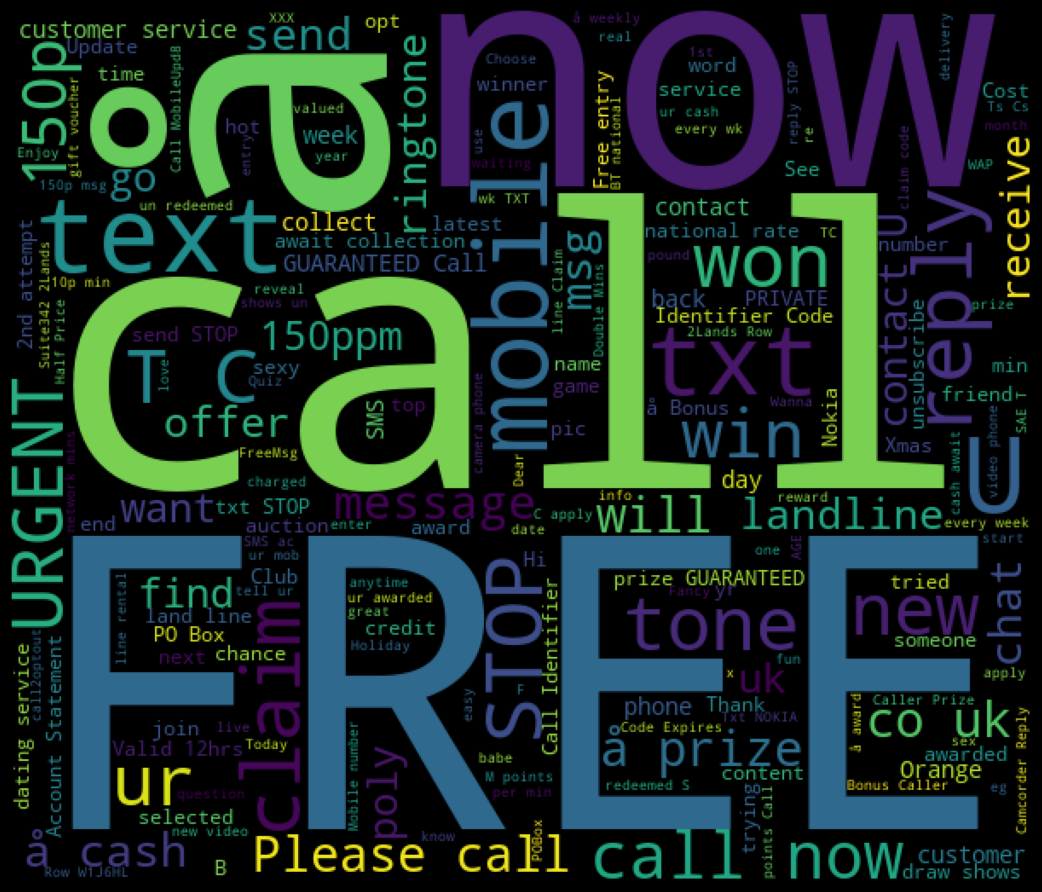

In [12]:
word_cloud('spam')

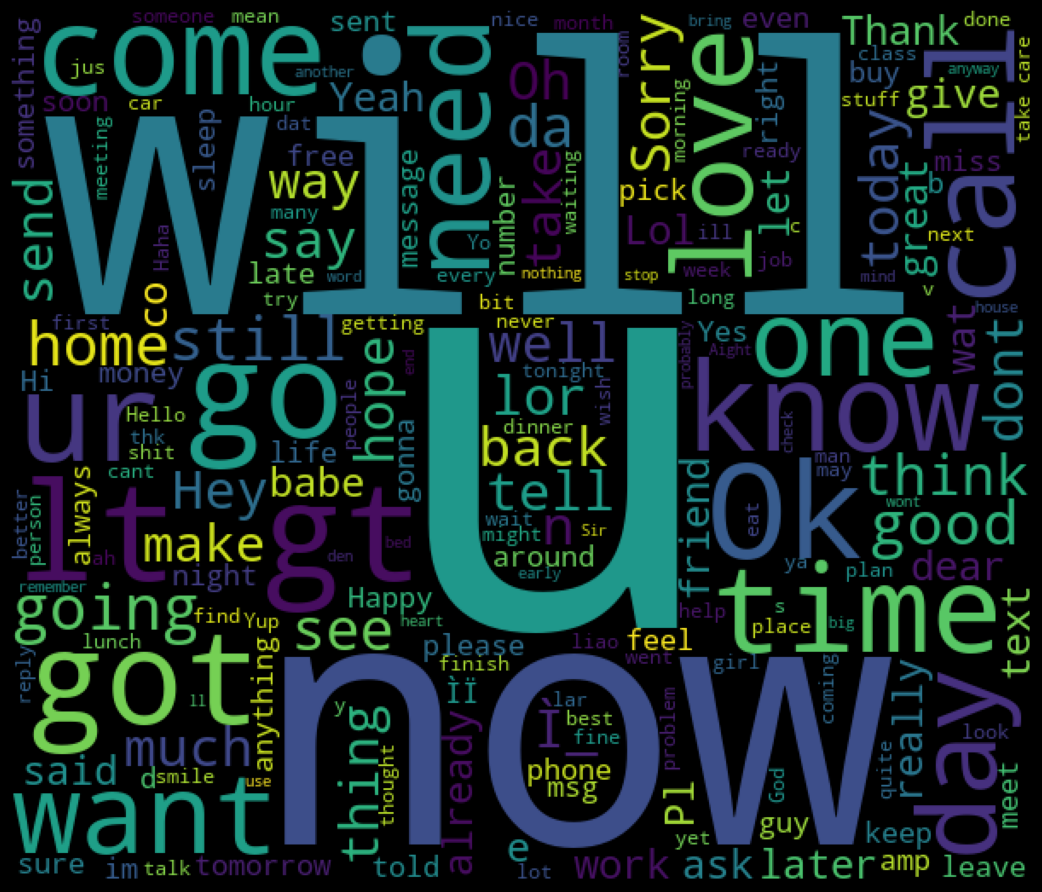

In [13]:
word_cloud('ham')

## Part A. Advanced Machine Learning for SPAM classification task


### I stage. Preliminary actions. Preparing of needed sets.


We must establish specific input parameters for our subsequent research endeavors, including the `vocabulary size`, dimensions of the `test` and `validation` sets, `dropping level`, the degree of data reduction, and other pertinent factors.

In [14]:
# Define the size of the vocabulary for word embedding
size_vocabulary = 1000

# Define the dimension of the embedding space
embedding_dimension = 64

# Define the type of truncation (post truncation)
trunc_type = 'post'

# Define the type of padding (post padding)
padding_type = 'post'

# Set a threshold value for binary classification
threshold = 0.5

# Define the out-of-vocabulary token
oov_token = "<OOV>"

# Define the proportions for the test and validation sets
# (Test set: 5% of the data, Validation set: 20% of the data)
test_size, valid_size = 0.05, 0.2

# Define the number of training epochs
num_epochs = 20

The subsequent steps facilitate a systematic approach to data cleaning, encompassing the following replacement procedures:

- Substitute email addresses with 'emailaddr'.
- Replace URLs with 'httpaddr'.
- Transform monetary symbols into 'moneysymb'.
- Convert phone numbers to 'phonenumbr'.
- Render numerical values as 'numbr'.
- Remove all punctuation marks.
- Convert all words to lowercase.

Additionally, we implement `lemmatization`, which, as we explained earlier, it is a morphological analysis technique that involves reducing word forms to their fundamental dictionary forms or lemmas. This process eliminates inflected endings and restores words to their base or root form within the lexicon. Consequently, lemmatization enhances text consistency and coherency.

This block of code performs a series of data preprocessing and cleaning steps on our dataset. It performs text preprocessing, including handling various types of patterns, removing noise, converting to lowercase, lemmatizing, and creating a list of processed messages.

In [15]:
# Print a message to indicate the beginning of the data preprocessing stage
print("\t\tStage I. Preliminary actions. Preparing of needed sets\n")

# Initialize an empty list to store cleaned and processed messages
full_df_l = []

# Create an instance of the WordNetLemmatizer for lemmatization.
lemmatizer = WordNetLemmatizer()

# Iterate through each row in the dataset
for i in range(df_spam.shape[0]):
    # Get the text content of the current row
    mess_1 = df_spam.iloc[i, 1]

    # Replace email addresses with 'emailaddr'
    mess_1 = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', mess_1)
    
    # Replace URLs with 'httpaddr'
    mess_1 = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', mess_1)
    
    # Replace monetary symbols with 'moneysymb'
    mess_1 = re.sub(r'£|\$', 'moneysymb', mess_1)
    
    # Replace phone numbers with 'phonenumbr'
    mess_1 = re.sub(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', mess_1)
    
    # Replace numbers with 'numbr'
    mess_1 = re.sub(r'\d+(\.\d+)?', 'numbr', mess_1)
    
    # Remove punctuation marks and special characters
    mess_1 = re.sub(r'[^\w\d\s]', ' ', mess_1)
    
    # Convert to lowercase and replace non-alphabetic characters with spaces
    mess_1 = re.sub(r'[^A-Za-z]', ' ', mess_1).lower()
    
    # Tokenize the cleaned message
    token_messages = word_tokenize(mess_1)
    
    # Initialize a list to store processed words
    mess = []
    
    # Iterate through each word in the tokenized message
    for word in token_messages:
        # Check if the word is not a stopword
        if word not in set(stopwords.words('english')):
            # Lemmatize the word and add it to the list
            mess.append(lemmatizer.lemmatize(word))
    
    # Join the processed words to form a cleaned message
    txt_mess = " ".join(mess)
    
    # Add the cleaned message to the list
    full_df_l.append(txt_mess)


		Stage I. Preliminary actions. Preparing of needed sets



Now, we will create a new plot to display the word counts, focusing on the most frequent words after all cleaning stages, excluding any stopwords.

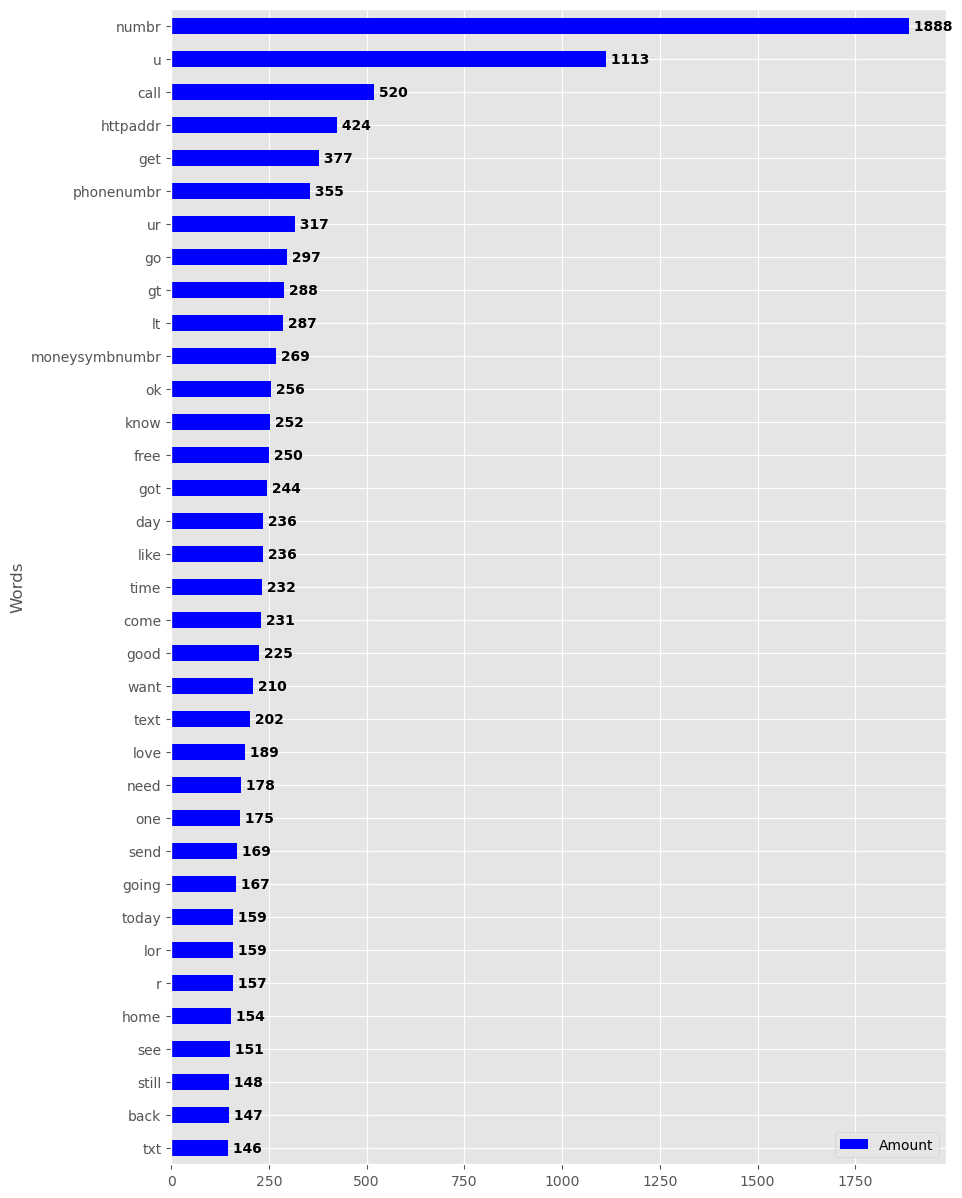

In [16]:
plot_words(full_df_l, number = 35)

The most frequent words are distinct from the stopwords, and you can compare this visualization with the outcome in the "Dataset primary statistics" section.

Next, we will separate the primary `df_spam` dataset into sentences (messages) and labels. The full primary `df_spam` dataset will then be divided into two subsets: a training set (75%) and a test set (25%). As a result, we will have four sets: two for sentences and two for labels, maintaining the same proportions.

Furthermore, we will perform `vectorization` using the `CountVectorizer` method. This approach facilitates the creation of a text document collection and the generation of a vocabulary of frequently occurring words. The method converts input text into a matrix, where the values represent the frequency of occurrence of each vocabulary word in the text. However, it's worth noting that while `FeatureHasher` offers more adjustable parameters (e.g., tokenizer customization), its processing speed is comparatively slower.

In [17]:
# Create CountVectorizer with specified vocabulary size
add_df = CountVectorizer(max_features=size_vocabulary)

# Transform text data to numerical matrix
X = add_df.fit_transform(full_df_l).toarray()
y = df_spam.iloc[:, 0]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (test_size + valid_size), random_state = seed)

# Print number of rows in test and training sets
print('Number of rows in test set:', X_test.shape[0])
print('Number of rows in training set:', X_train.shape[0])

Number of rows in test set: 1293
Number of rows in training set: 3876


### II stage. Naive Bayes Classifier.


We will generate predictions using two models: `Gaussian Naive Bayes` and `Multinomial Naive Bayes`. Additionally, we'll create a `classification report` and visualize the `confusion matrix`.

		Stage IIa. Guassian Naive Bayes

The first two predicted labels: spam ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.98      0.77      0.86      1107
        spam       0.40      0.93      0.56       186

    accuracy                           0.79      1293
   macro avg       0.69      0.85      0.71      1293
weighted avg       0.90      0.79      0.82      1293
 



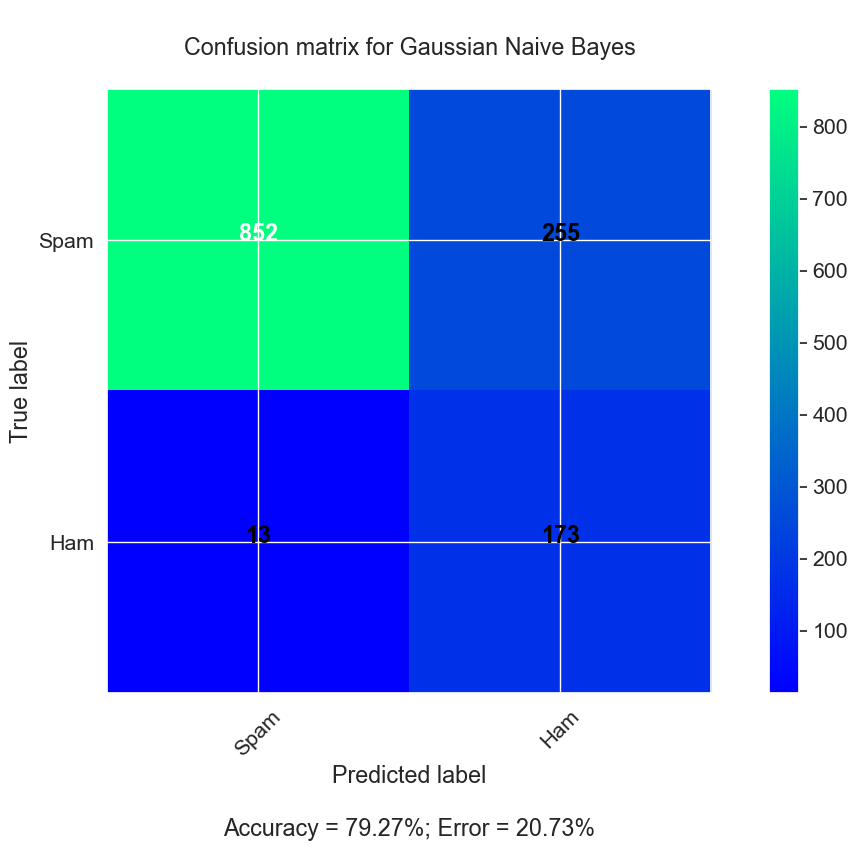

In [18]:
# Stage IIa. Guassian Naive Bayes
print("\t\tStage IIa. Guassian Naive Bayes\n")

# Fit the Gaussian Naive Bayes model
class_NBC = GaussianNB().fit(X_train, y_train)
y_pred_NBC = class_NBC.predict(X_test) # Perform predictions

# Display the first two predicted labels
print('The first two predicted labels:', y_pred_NBC[0], y_pred_NBC[1], '\n')

# Compute the confusion matrix for Gaussian Naive Bayes
conf_m_NBC = confusion_matrix(y_test, y_pred_NBC)

# Generate the classification report for Gaussian Naive Bayes
class_rep_NBC = classification_report(y_test, y_pred_NBC)
print('\t\t\tClassification report:\n\n', class_rep_NBC, '\n')

# Plot the confusion matrix for Gaussian Naive Bayes
plot_conf_matr(conf_m_NBC, classes=['Spam', 'Ham'], normalize=False, title='Confusion matrix for Gaussian Naive Bayes')

		Stage IIb. Multinomial Naive Bayes

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1107
        spam       0.91      0.92      0.91       186

    accuracy                           0.98      1293
   macro avg       0.95      0.95      0.95      1293
weighted avg       0.98      0.98      0.98      1293
 



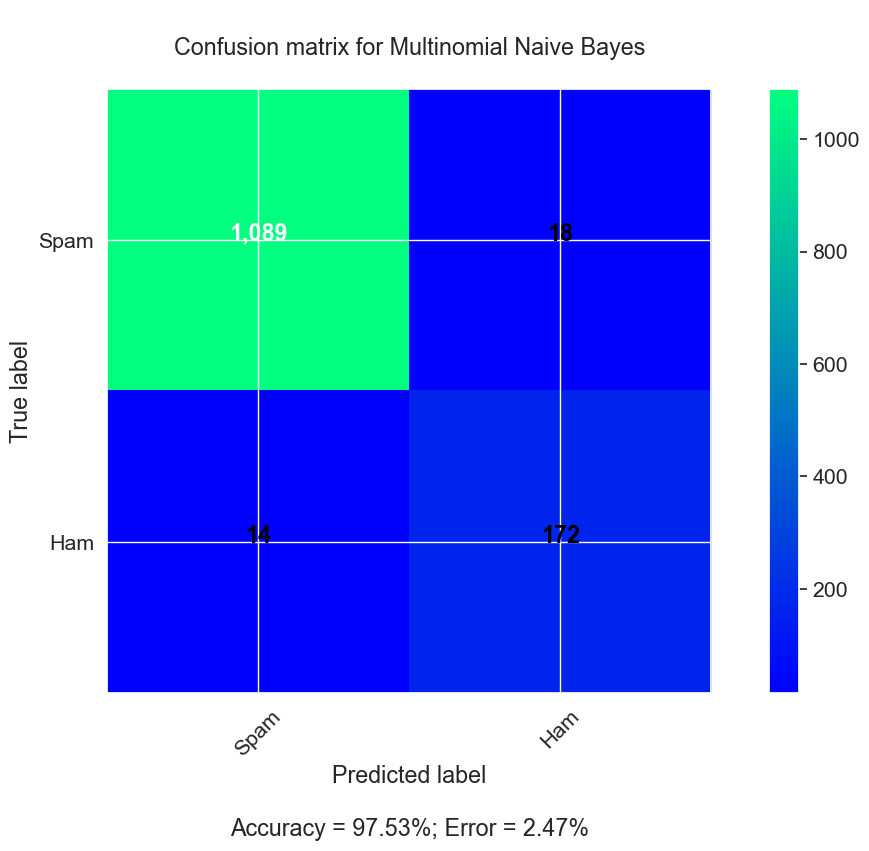

In [19]:
# Stage IIb. Multinomial Naive Bayes
print("\t\tStage IIb. Multinomial Naive Bayes\n")

# Fit the Multinomial Naive Bayes model
class_MNB = MultinomialNB().fit(X_train, y_train)
y_pred_MNB = class_MNB.predict(X_test) # Perform predictions

# Display the first two predicted labels
print('The first two predicted labels:', y_pred_MNB[0], y_pred_MNB[1], '\n')

# Compute the confusion matrix for Multinomial Naive Bayes
conf_m_MNB = confusion_matrix(y_test, y_pred_MNB)

# Generate the classification report for Multinomial Naive Bayes
class_rep_MNB = classification_report(y_test, y_pred_MNB)
print('\t\t\tClassification report:\n\n', class_rep_MNB, '\n')

# Plot the confusion matrix for Multinomial Naive Bayes
plot_conf_matr(conf_m_MNB, classes=['Spam', 'Ham'], normalize=False, title='Confusion matrix for Multinomial Naive Bayes')

### III stage. Decision Tree Classifier.


We will now obtain predictions using the `Decision Tree Classifier` model. Additionally, we'll create a `classification report` and visualize the `confusion matrix`.

		Stage III. Decision Tree Classifier

The first two predicted labels: ham spam 

			Classification report:

               precision    recall  f1-score   support

         ham       0.97      0.98      0.98      1107
        spam       0.89      0.84      0.87       186

    accuracy                           0.96      1293
   macro avg       0.93      0.91      0.92      1293
weighted avg       0.96      0.96      0.96      1293
 



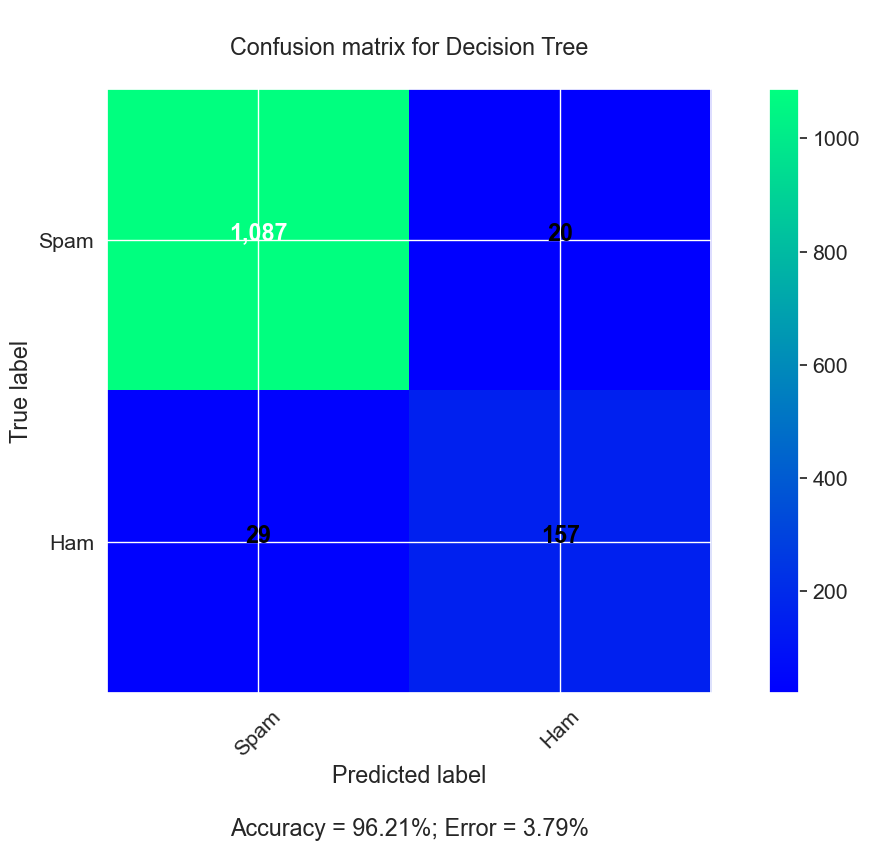

In [20]:
# Stage III. Decision Tree Classifier
print("\t\tStage III. Decision Tree Classifier\n")

# Create and fit the Decision Tree Classifier model
class_DTC = DecisionTreeClassifier(random_state = seed).fit(X_train, y_train)

# Make predictions using the Decision Tree Classifier
y_pred_DTC = class_DTC.predict(X_test)
print('The first two predicted labels:', y_pred_DTC[0], y_pred_DTC[1], '\n')

# Calculate the confusion matrix for Decision Tree Classifier
conf_m_DTC = confusion_matrix(y_test, y_pred_DTC)

# Generate the classification report for Decision Tree Classifier
class_rep_DTC = classification_report(y_test, y_pred_DTC)
print('\t\t\tClassification report:\n\n', class_rep_DTC, '\n')

# Plot the confusion matrix for Decision Tree Classifier
plot_conf_matr(conf_m_DTC, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for Decision Tree')

### IV stage. Logistic Regression.


"We will now generate predictions using our `Logistic Regression` model and proceed to create a `classification report` as well as visualize the `confusion matrix`."

		Stage IV. Logistic Regression

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1107
        spam       0.98      0.87      0.92       186

    accuracy                           0.98      1293
   macro avg       0.98      0.93      0.96      1293
weighted avg       0.98      0.98      0.98      1293
 



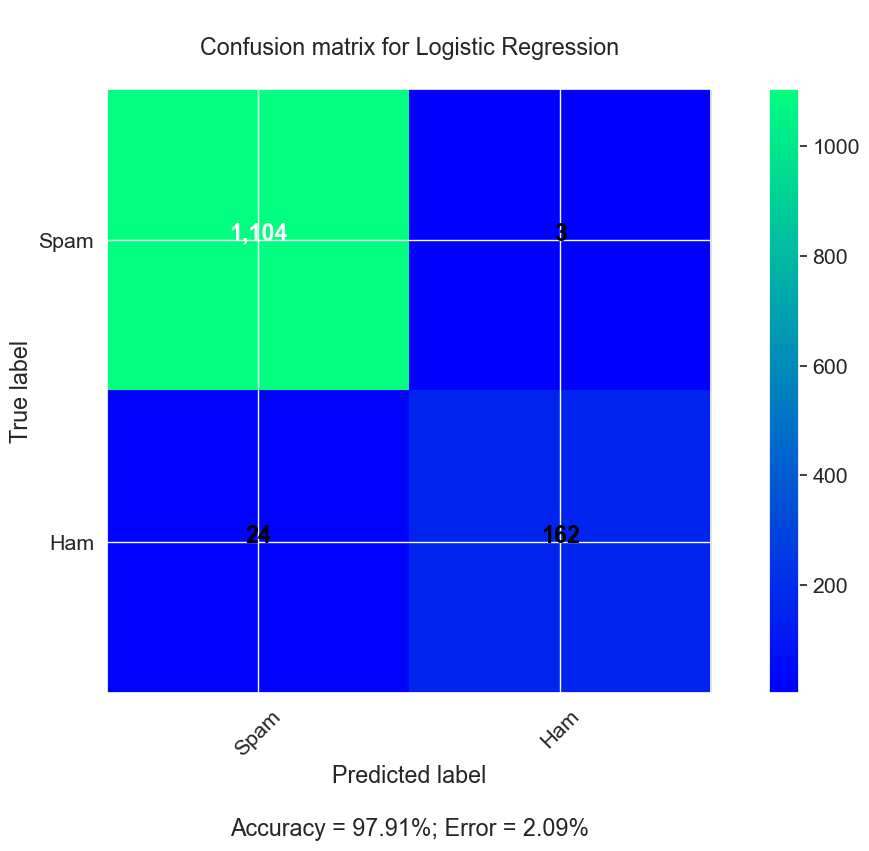

In [21]:
# Stage IV. Logistic Regression
print("\t\tStage IV. Logistic Regression\n")

# Create and fit the Logistic Regression model
class_LR = LogisticRegression(random_state = seed, solver = 'liblinear').fit(X_train, y_train)

# Make predictions using the Logistic Regression model
y_pred_LR = class_LR.predict(X_test)
print('The first two predicted labels:', y_pred_LR[0], y_pred_LR[1], '\n')

# Calculate the confusion matrix for Logistic Regression
conf_m_LR = confusion_matrix(y_test, y_pred_LR)

# Generate the classification report for Logistic Regression
class_rep_LR = classification_report(y_test, y_pred_LR)
print('\t\t\tClassification report:\n\n', class_rep_LR, '\n')

# Plot the confusion matrix for Logistic Regression
plot_conf_matr(conf_m_LR, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for Logistic Regression')


### V stage. KNeighbors Classifier.


We will now use our `KNeighbors Classifier` model to generate predictions. Additionally, we will create a `classification report` and visualize the `confusion matrix`.

		Stage V. KNeighbors Classifier

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1107
        spam       0.98      0.66      0.78       186

    accuracy                           0.95      1293
   macro avg       0.96      0.83      0.88      1293
weighted avg       0.95      0.95      0.94      1293
 



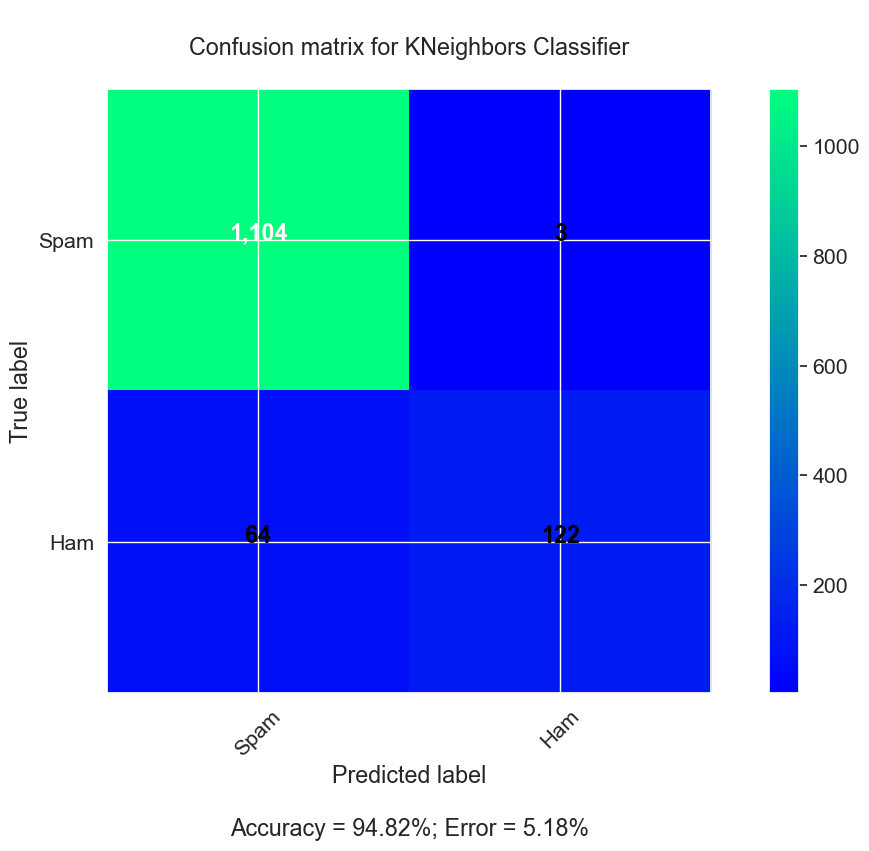

In [22]:
# Stage V. KNeighbors Classifier
print("\t\tStage V. KNeighbors Classifier\n")

# Create and fit the KNeighbors Classifier model
class_KNC = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

# Make predictions using the KNeighbors Classifier
y_pred_KNC = class_KNC.predict(X_test)
print('The first two predicted labels:', y_pred_KNC[0], y_pred_KNC[1], '\n')

# Calculate the confusion matrix for KNeighbors Classifier
conf_m_KNC = confusion_matrix(y_test, y_pred_KNC)

# Generate the classification report for KNeighbors Classifier
class_rep_KNC = classification_report(y_test, y_pred_KNC)
print('\t\t\tClassification report:\n\n', class_rep_KNC, '\n')

# Plot the confusion matrix for KNeighbors Classifier
plot_conf_matr(conf_m_KNC, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for KNeighbors Classifier')

### VI stage. Support Vector Classification.


We will generate predictions using our `Support Vector Classification` model. Additionally, we'll create a `classification report` and visualize the `confusion matrix`.

		Stage VI. Support Vector Classification

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1107
        spam       0.98      0.85      0.91       186

    accuracy                           0.98      1293
   macro avg       0.98      0.93      0.95      1293
weighted avg       0.98      0.98      0.98      1293
 



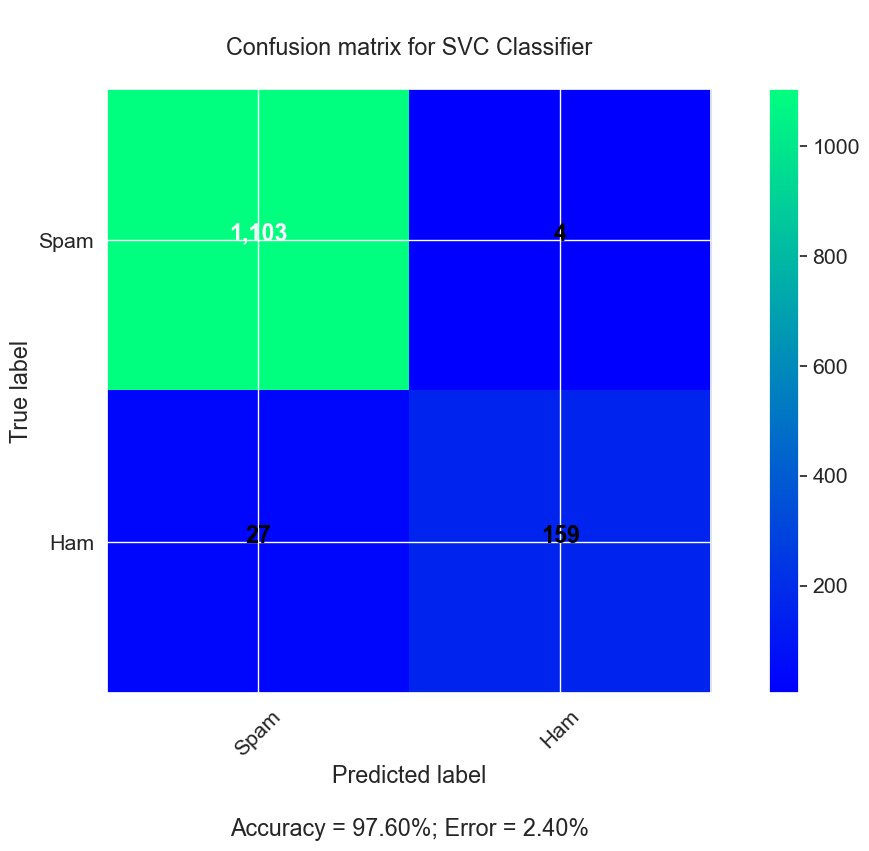

In [23]:
# Stage VI. Support Vector Classification
print("\t\tStage VI. Support Vector Classification\n")

# Create and fit the Support Vector Classification model
class_SVC = SVC(probability = True, random_state = seed).fit(X_train, y_train)

# Make predictions using the Support Vector Classification model
y_pred_SVC = class_SVC.predict(X_test)
print('The first two predicted labels:', y_pred_SVC[0], y_pred_SVC[1], '\n')

# Calculate the confusion matrix for Support Vector Classification
conf_m_SVC = confusion_matrix(y_test, y_pred_SVC)

# Generate the classification report for Support Vector Classification
class_rep_SVC = classification_report(y_test, y_pred_SVC)
print('\t\t\tClassification report:\n\n', class_rep_SVC, '\n')

# Plot the confusion matrix for Support Vector Classification
plot_conf_matr(conf_m_SVC, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for SVC Classifier')

### VII stage. Gradient Boosting Classifier.


We will generate predictions using the `Gradient Boosting Classifier` model and then proceed to create a `classification report` and visualize the `confusion matrix`.

		Stage VII. Gradient Boosting Classifier

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1107
        spam       0.99      0.83      0.90       186

    accuracy                           0.97      1293
   macro avg       0.98      0.91      0.94      1293
weighted avg       0.97      0.97      0.97      1293
 



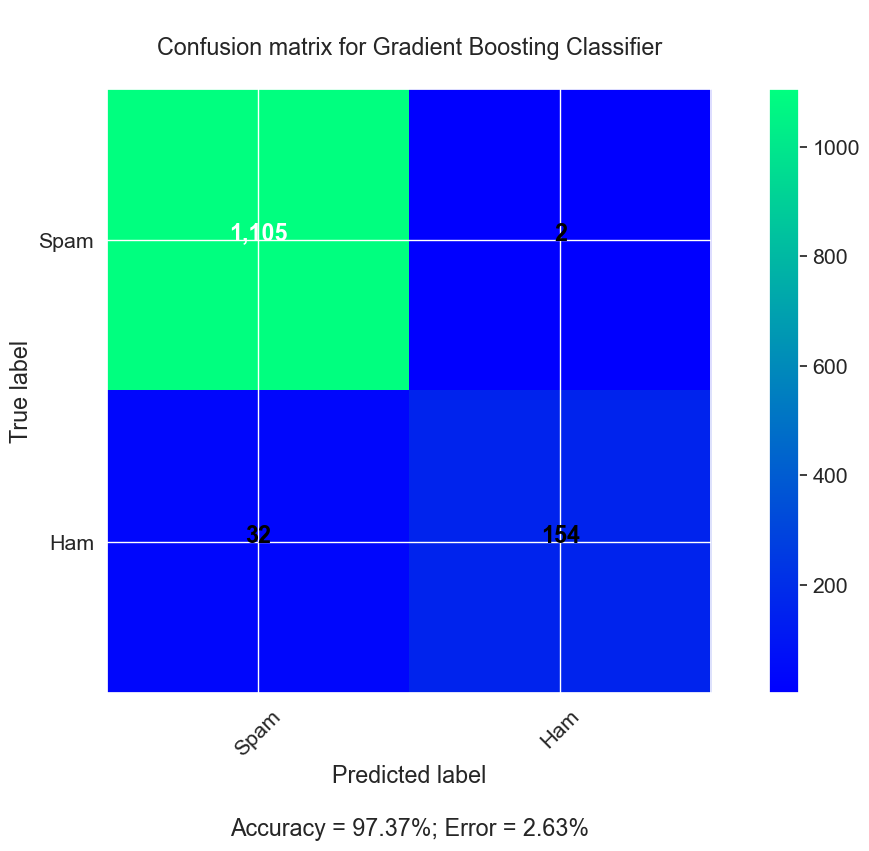

In [24]:
# Stage VII. Gradient Boosting Classifier
print("\t\tStage VII. Gradient Boosting Classifier\n")

# Create and fit the Gradient Boosting Classifier model
class_GBC = GradientBoostingClassifier(random_state = seed).fit(X_train, y_train)

# Make predictions using the Gradient Boosting Classifier
y_pred_GBC = class_GBC.predict(X_test)
print('The first two predicted labels:', y_pred_GBC[0], y_pred_GBC[1], '\n')

# Calculate the confusion matrix for Gradient Boosting Classifier
conf_m_GBC = confusion_matrix(y_test, y_pred_GBC)

# Generate the classification report for Gradient Boosting Classifier
class_rep_GBC = classification_report(y_test, y_pred_GBC)
print('\t\t\tClassification report:\n\n', class_rep_GBC, '\n')

# Plot the confusion matrix for Gradient Boosting Classifier
plot_conf_matr(conf_m_GBC, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for Gradient Boosting Classifier')

### VIII stage. Bagging Classifier.


We will now obtain a set of predictions using the `Bagging Classifier` model. Furthermore, we will generate a `classification report` and visualize the `confusion matrix`. 

The `Bagging Classifier` can work with some different classifiers as with basic ones, such as `SVC`, `KNC`, `DTC`, etc. In this case, the main purpose of its usage is to increase the accuracy obtained earlier from the basic classifier. Here we will run our `Bagging Classifier` model three different times, each of them using a different classifier: `SVC`, `KNC`, `DTC`.

		Stage VIII. Bagging Classifier + something else

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1107
        spam       0.97      0.89      0.93       186

    accuracy                           0.98      1293
   macro avg       0.98      0.94      0.96      1293
weighted avg       0.98      0.98      0.98      1293
 



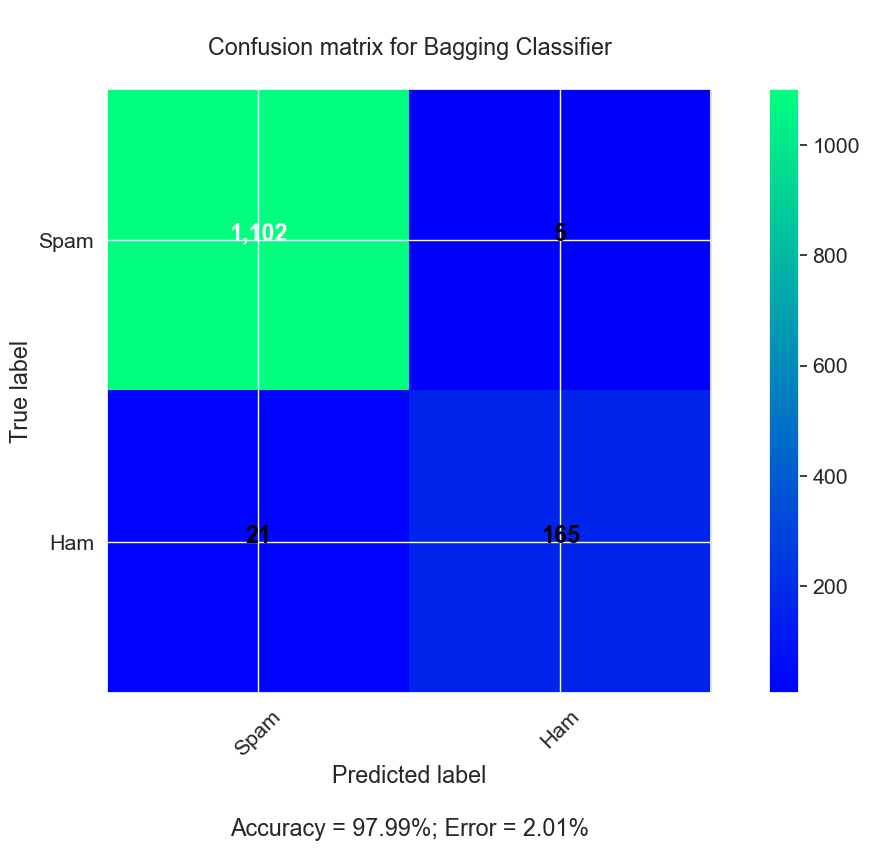

In [25]:
# Stage VIII. Bagging Classifier + something else
print("\t\tStage VIII. Bagging Classifier + something else\n")

# Create and fit the Bagging Classifier model using SVC classifier as the base estimator
class_BC = BaggingClassifier(base_estimator=class_SVC).fit(X_train, y_train)

# Make predictions using the Bagging Classifier
y_pred_BC = class_BC.predict(X_test)
print('The first two predicted labels:', y_pred_BC[0], y_pred_BC[1], '\n')

# Calculate the confusion matrix for Bagging Classifier
conf_m_BC = confusion_matrix(y_test, y_pred_BC)

# Generate the classification report for Bagging Classifier
class_rep_BC = classification_report(y_test, y_pred_BC)
print('\t\t\tClassification report:\n\n', class_rep_BC, '\n')

# Plot the confusion matrix for Bagging Classifier
plot_conf_matr(conf_m_BC, classes=['Spam', 'Ham'], normalize=False, title='Confusion matrix for Bagging Classifier')

		Stage VIII. Bagging Classifier + something else

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1107
        spam       0.95      0.86      0.90       186

    accuracy                           0.97      1293
   macro avg       0.96      0.93      0.94      1293
weighted avg       0.97      0.97      0.97      1293
 



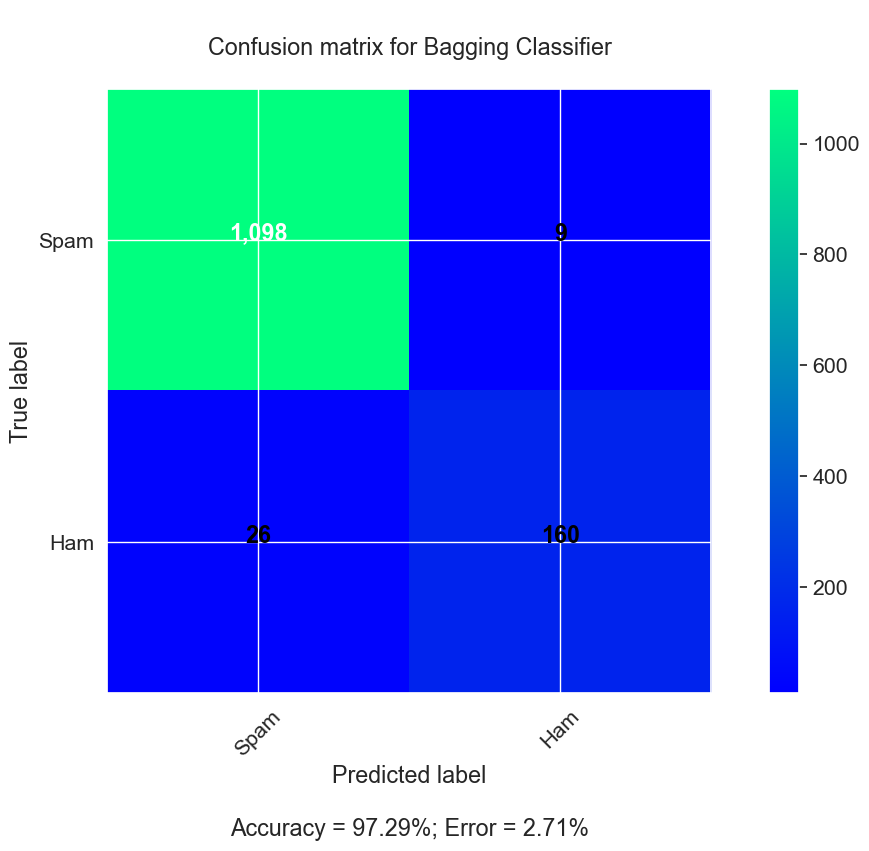

In [26]:
# Stage VIII. Bagging Classifier + something else
print("\t\tStage VIII. Bagging Classifier + something else\n")

# Create and fit the Bagging Classifier model using DTC classifier as the base estimator
class_BC = BaggingClassifier(base_estimator=class_DTC).fit(X_train, y_train)

# Make predictions using the Bagging Classifier
y_pred_BC = class_BC.predict(X_test)
print('The first two predicted labels:', y_pred_BC[0], y_pred_BC[1], '\n')

# Calculate the confusion matrix for Bagging Classifier
conf_m_BC = confusion_matrix(y_test, y_pred_BC)

# Generate the classification report for Bagging Classifier
class_rep_BC = classification_report(y_test, y_pred_BC)
print('\t\t\tClassification report:\n\n', class_rep_BC, '\n')

# Plot the confusion matrix for Bagging Classifier
plot_conf_matr(conf_m_BC, classes=['Spam', 'Ham'], normalize=False, title='Confusion matrix for Bagging Classifier')

		Stage VIII. Bagging Classifier + something else

The first two predicted labels: ham ham 

			Classification report:

               precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1107
        spam       0.98      0.63      0.77       186

    accuracy                           0.95      1293
   macro avg       0.96      0.82      0.87      1293
weighted avg       0.95      0.95      0.94      1293
 



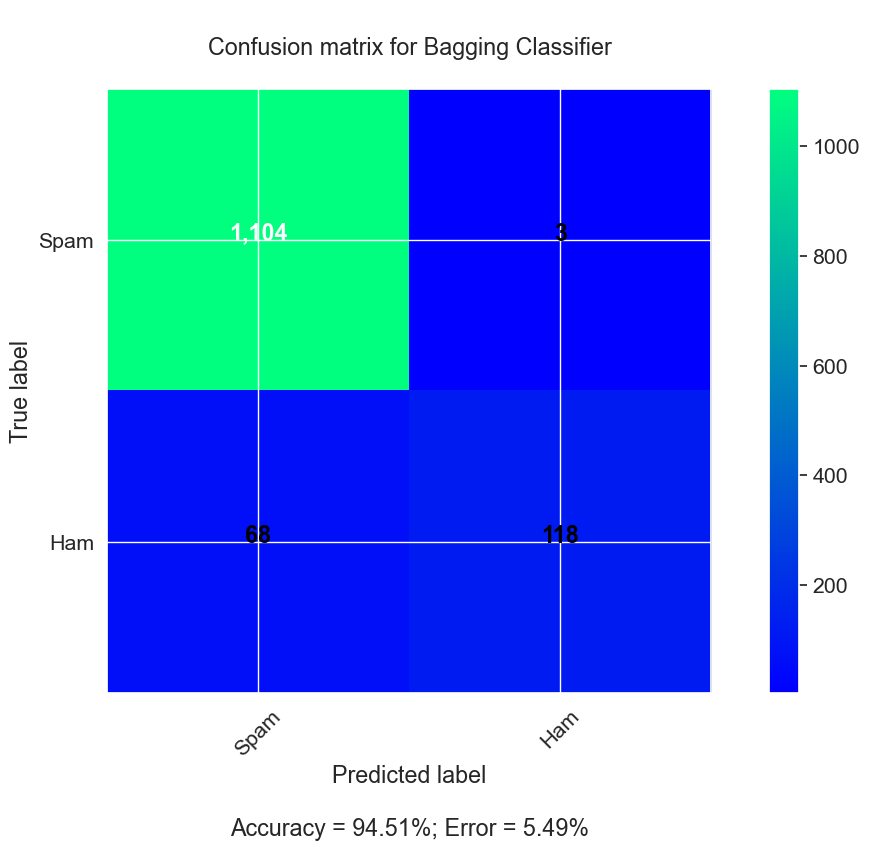

In [27]:
# Stage VIII. Bagging Classifier + something else
print("\t\tStage VIII. Bagging Classifier + something else\n")

# Create and fit the Bagging Classifier model using KNC classifier as the base estimator
class_BC = BaggingClassifier(base_estimator=class_KNC).fit(X_train, y_train)

# Make predictions using the Bagging Classifier
y_pred_BC = class_BC.predict(X_test)
print('The first two predicted labels:', y_pred_BC[0], y_pred_BC[1], '\n')

# Calculate the confusion matrix for Bagging Classifier
conf_m_BC = confusion_matrix(y_test, y_pred_BC)

# Generate the classification report for Bagging Classifier
class_rep_BC = classification_report(y_test, y_pred_BC)
print('\t\t\tClassification report:\n\n', class_rep_BC, '\n')

# Plot the confusion matrix for Bagging Classifier
plot_conf_matr(conf_m_BC, classes=['Spam', 'Ham'], normalize=False, title='Confusion matrix for Bagging Classifier')

## Part B. Advanced Deep Learning for SPAM classification task


### I stage. Preliminary actions. Preparing of needed sets.


We need to prepare our datasets for the new deep learning model designed for the SPAM classification task. This involves creating training, validation, and test sets based on the original `df_spam` dataset. The training set is used to train a pre-built model, the validation set helps in optimizing hyperparameters, and the test set evaluates the trained model's performance on previously unseen data.

To begin, the primary `df_spam` dataset will be divided into sentences (messages) and their corresponding labels. Subsequently, the complete `df_spam` dataset will be partitioned into three subsets, maintaining the following proportions: a training set (75%), a validation set (20%), and a test set (5%). This process results in the creation of six sets in total—three for sentences and three for labels—all with consistent proportions.

In [28]:
# Stage I. Preliminary actions. Preparing of needed sets
print("Stage I. Preliminary actions. Preparing of needed sets\n")

# Initialize empty lists to store sentences and labels for the new sets
sentences_new_set = []
labels_new_set = []

# Iterate through the rows of the df_spam dataset
for i in range(0, df_spam.shape[0], 1):
    # Append each message to the sentences_new_set list
    sentences_new_set.append(df_spam['message'][i])
    
    # Append each label to the labels_new_set list
    labels_new_set.append(df_spam['feature'][i])


Stage I. Preliminary actions. Preparing of needed sets



In [29]:
# Calculate the size of the training set based on the proportions
train_size = int(df_spam.shape[0] * (1 - test_size - valid_size))

# Calculate the index boundary for the validation set
valid_bound = int(df_spam.shape[0] * (1 - valid_size))

# Split the sentences into training, validation, and test sets based on the calculated indices
train_sentences = sentences_new_set[0 : train_size]
valid_sentences = sentences_new_set[train_size : valid_bound]
test_sentences = sentences_new_set[valid_bound : ]

# Split the labels into training, validation, and test sets based on the calculated indices
train_labels_str = labels_new_set[0 : train_size]
valid_labels_str = labels_new_set[train_size : valid_bound]
test_labels_str = labels_new_set[valid_bound : ]

### II stage. Labels transformations.


Next, we will convert the labels (which have the values `ham` and `spam`) to their corresponding numerical representations: `1` and `0`, and then convert them into Numpy arrays.

In [30]:
# Stage II. Labels transformations
print("Stage II. Labels transformations\n")

# Transforming training set labels to numerical values
train_labels = [0] * len(train_labels_str)
for ind, item in enumerate(train_labels_str):
    if item == 'ham':
        train_labels[ind] = 1
    else:
        train_labels[ind] = 0

# Transforming validation set labels to numerical values
valid_labels = [0] * len(valid_labels_str)
for ind, item in enumerate(valid_labels_str):
    if item == 'ham':
        valid_labels[ind] = 1
    else:
        valid_labels[ind] = 0

# Transforming test set labels to numerical values
test_labels = [0] * len(test_labels_str)
for ind, item in enumerate(test_labels_str):
    if item == 'ham':
        test_labels[ind] = 1
    else:
        test_labels[ind] = 0

# Converting the transformed labels into Numpy arrays
train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)
test_labels = np.array(test_labels)


Stage II. Labels transformations



### III stage. Tokenization.


[Tokenization](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_DL_spam_classification_L427910497-2022-01-01) involves breaking down a substantial body of text into smaller units like lines or words. This facilitates understanding the text's meaning by analyzing the word sequence. After transforming our output feature into numerical values, the question arises: how do we handle the input feature based on `size_vocabulary`?

First, let's tokenize our data and convert it into a numerical sequence using the `Tokenizer` from `Keras`. This process also enables us to establish the index number `word_index` for corresponding words. Dealing with sentences not present in the training set requires a substantial word index. To address this, we can utilize the `Out Of Vocabulary` <OOV> token specified by the `oov_token` variable.

In [31]:
# Stage III. Tokenization
print("Stage III. Tokenization\n")

# Initialize the Tokenizer with specified parameters
tokenizer = Tokenizer(num_words = size_vocabulary,
                      oov_token = oov_token,
                      lower = False)

# Fit the Tokenizer on the training sentences to create a word index
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index  # Obtain the word index


Stage III. Tokenization



As evident from the `text_to_sequence` output, the sequences have varying lengths, which is not suitable for model training. Therefore, it's necessary to standardize the length of all sentences. To achieve this, we utilize padding by applying the specified `padding_type`.

In [32]:
# Tokenize training sentences and convert them to sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)

# Determine the size of the vocabulary
size_voc = len(word_index) + 1

# Find the maximum sequence length in the training set
max_len = max([len(i) for i in train_sequences])

# Pad and truncate training sequences to a uniform length
train_set = pad_sequences(train_sequences,
                          padding = padding_type,
                          maxlen = max_len,
                          truncating = trunc_type) 

# Tokenize validation sentences and pad them to the same length as training sequences
valid_sequences = tokenizer.texts_to_sequences(valid_sentences)
valid_set = pad_sequences(valid_sequences,
                         padding = padding_type,
                         maxlen = max_len,
                         truncating = trunc_type)

# Tokenize test sentences and pad them to the same length as training sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_set = pad_sequences(test_sequences,
                        padding = padding_type,
                        maxlen = max_len,
                        truncating = trunc_type)

### IV stage. Model building.


The initial layer of the model is the `Embedding` layer, responsible for generating dense word encodings based on the specified vocabulary size (`size_voc`) derived from the vocabulary index `word_index` of words plus one. This differentiation between sparse and dense encodings emphasizes coding efficiency.

Subsequently, we employ a series of layer pairs—namely, `Dense` and `Dropout` layers. Here, we have the flexibility to determine the number of these layer pairs, tailoring the architecture to our needs.

The utilization of a `bidirectional LSTM` entails processing input in dual directions: from past to future and vice versa, setting it apart from the `unidirectional LSTM` which operates solely in one direction, potentially overlooking future information. By harnessing both hidden states, this approach captures insights from both temporal directions. 

`Dropout` layer comes into play to mitigate overfitting by randomly deactivating neurons during training, determined by the dropout probability `p`, effectively retaining neurons in the network with a probability of `1 - p`.

A `Dense` layer refers to a conventional densely connected neural network layer, with each neuron linked to all input elements.

In [33]:
# Stage IV. Model building
print("Stage IV. Model building\n")

# Define the dropout rate
drop_level = 0.2  # Adjust this value as needed (In this case, after multiple tries I found 0.2 ot be the most optimal value)

# Create the model architecture using the Sequential API
model = Sequential([
    # Embedding layer for generating dense word encodings based on vocabulary size
    Embedding(size_voc, embedding_dimension, input_length=max_len),
    
    # Bidirectional LSTM layer for capturing temporal patterns from both directions
    Bidirectional(LSTM(100)),
    
    # Dropout layer to prevent overfitting by randomly dropping neurons during training
    Dropout(drop_level),
    
    # Dense layer with 20 neurons and ReLU activation function
    Dense(20, activation='relu'),
    
    # Another Dropout layer for regularization
    Dropout(drop_level),
    
    # Dense output layer with 1 neuron and sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

Stage IV. Model building



### V stage. Model compiling & fitting.


In this phase, you'll be able to train your model. However, before proceeding, it's important to establish values for certain hyperparameters and other variables. These include parameters like `batch size`, the number of training `epochs`, the chosen `optimizer`, and the desired `loss` function. You retain the flexibility to modify any or all of these parameters as you conduct your research.

In [34]:
# Stage V. Model compiling & fitting
print("Stage V. Model compiling & fitting\n")

# Define the optimizer using the Adam optimizer with a specific learning rate
optim = Adam(learning_rate = 0.0001)

# Compile the model with binary cross-entropy loss function, the defined optimizer, and accuracy metric
model.compile(loss = 'binary_crossentropy',
              optimizer = optim,
              metrics = ['accuracy'])

# Display a summary of the model's architecture
model.summary()

Stage V. Model compiling & fitting

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 189, 64)           606080    
                                                                 
 bidirectional (Bidirection  (None, 200)               132000    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 20)                4020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                    

In [35]:
# Train the model using the training set and labels
history = model.fit(train_set, 
                    train_labels,
                    epochs=num_epochs, 
                    validation_data=(valid_set, valid_labels),
                    workers=os.cpu_count(),
                    use_multiprocessing=True,
                    verbose=1)

Epoch 1/20
122/122 [==============================] - 21s 149ms/step - loss: 0.5351 - accuracy: 0.8233 - val_loss: 0.3467 - val_accuracy: 0.8803
Epoch 2/20
122/122 [==============================] - 19s 159ms/step - loss: 0.3090 - accuracy: 0.8715 - val_loss: 0.2583 - val_accuracy: 0.8803
Epoch 3/20
122/122 [==============================] - 23s 192ms/step - loss: 0.2145 - accuracy: 0.9265 - val_loss: 0.2035 - val_accuracy: 0.9305
Epoch 4/20
122/122 [==============================] - 24s 195ms/step - loss: 0.1451 - accuracy: 0.9556 - val_loss: 0.1503 - val_accuracy: 0.9498
Epoch 5/20
122/122 [==============================] - 22s 182ms/step - loss: 0.1106 - accuracy: 0.9701 - val_loss: 0.1119 - val_accuracy: 0.9575
Epoch 6/20
122/122 [==============================] - 22s 184ms/step - loss: 0.0878 - accuracy: 0.9757 - val_loss: 0.0896 - val_accuracy: 0.9691
Epoch 7/20
122/122 [==============================] - 21s 172ms/step - loss: 0.0679 - accuracy: 0.9812 - val_loss: 0.0663 - val_ac

### VI stage. Results visualization.


In this section we can observe the outcomes of the training in terms of loss and accuracy.

Stage VI. Results visualization



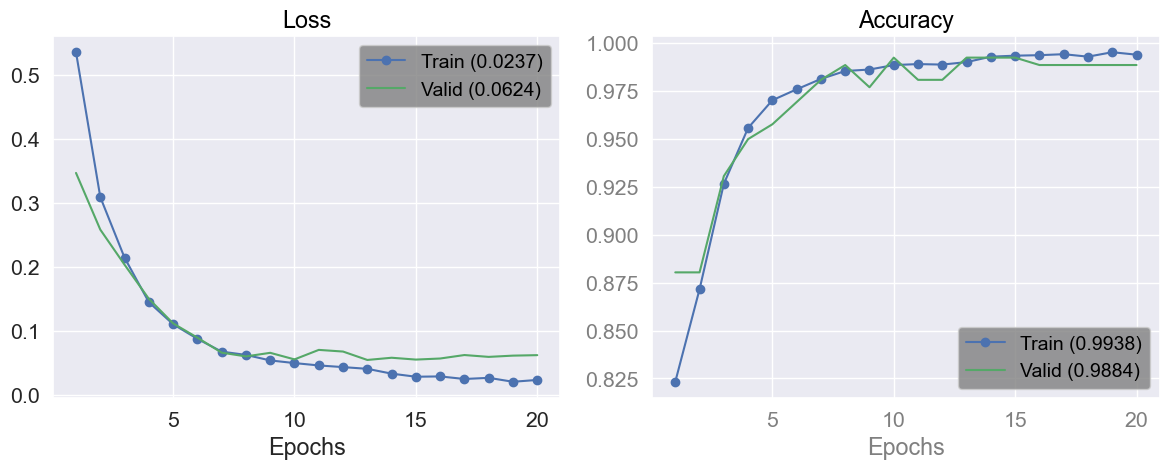

In [36]:
print("Stage VI. Results visualization\n")
plot_history(history) # Visualize the training and validation history

We can clearly observe a decrease in the values of the 'loss' metric and an increase in the values of the 'accuracy' metric after mostly each iteration. This indicates positive progress in our model training process. In other words, this pattern signifies that our model is learning effectively.

Furthermore, let's evaluate your pre-built model using the test set, ensuring that the model performs on unseen data.

In [37]:
model_score = model.evaluate(test_set, test_labels, batch_size = embedding_dimension, verbose = 1)
print(f"Test accuracy: {model_score[1] * 100:0.2f}% \t\t Test error: {model_score[0]:0.4f}")

17/17 [==============================] - 1s 53ms/step - loss: 0.0566 - accuracy: 0.9836
Test accuracy: 98.36% 		 Test error: 0.0566


### VII stage. Model saving & predict checking.


We have the option to store our model and tokenizer for future application in various formats. To achieve this, we need to complete two additional steps: 

1. Save our trained model for later utilization in upcoming research endeavors
2. Validate the saved model's performance by making predictions.

In [38]:
# Define a name for the saved model
M_name = "My_model"

# Save the tokenizer using pickle
pickle.dump(tokenizer, open(M_name + ".pkl", "wb"))

# Define the filepath for the saved model
filepath = M_name + '.h5'

# Save the trained model in h5 format and display the size of the saved model
tf.keras.models.save_model(model, filepath, include_optimizer=True, save_format='h5', overwrite=True)
print("Size of the saved model:", os.stat(filepath).st_size, "bytes")

Size of the saved model: 8963024 bytes


Next, we will generate predictions using our model. By specifying a `threshold` value of `0.5`, we can differentiate between correctly and incorrectly predicted labels. Additionally, similar to the approach used for the previously studied ML models (as seen in `Part A`), we will create a `classification report` and visualize the `confusion matrix`.

33/33 [==============================] - 2s 34ms/step
			Classification report:

               precision    recall  f1-score   support

           0       0.92      0.93      0.93       117
           1       0.99      0.99      0.99       917

    accuracy                           0.98      1034
   macro avg       0.96      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034
 



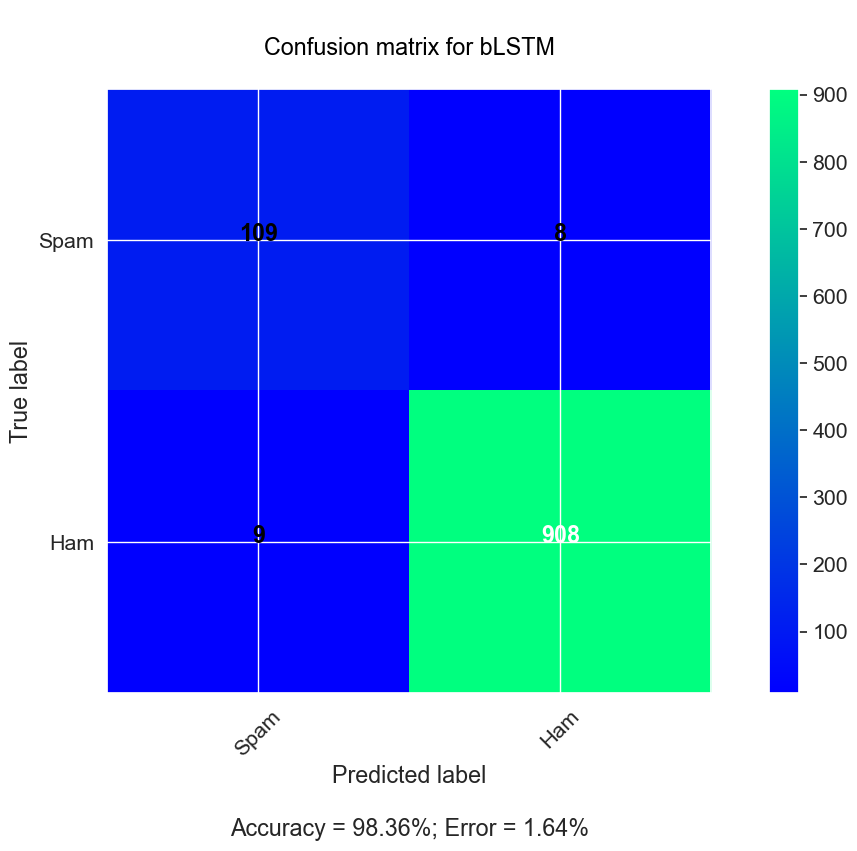

In [39]:
# Generate predictions using the trained model on the test set
y_pred_bLSTM = model.predict(test_set)

# Initialize a list to store the binary predictions based on the specified threshold
y_prediction = [0] * y_pred_bLSTM.shape[0]
for ind, item in enumerate(y_pred_bLSTM):
    if item > threshold:
        y_prediction[ind] = 1
    else:
        y_prediction[ind] = 0

# Calculate the confusion matrix for the binary LSTM model
conf_m_bLSTM = confusion_matrix(test_labels, y_prediction)

# Generate the classification report for the binary LSTM model
class_rep_bLSTM = classification_report(test_labels, y_prediction)
print('\t\t\tClassification report:\n\n', class_rep_bLSTM, '\n')

# Plot the confusion matrix for the binary LSTM model
plot_conf_matr(conf_m_bLSTM, classes = ['Spam','Ham'], normalize = False, title = 'Confusion matrix for bLSTM')

Let's evaluate the performance of our trained model using real messages that we can generate.

In [40]:
# Example messages to test the model
message_example = ["Thank you for signing up for our Premium Membership. Your subscription includes exclusive benefits and content. To confirm your subscription, please reply with 'YES' or 'NO'. If you respond 'NO', you will not be enrolled and won't incur any charges."]
message_example_2 = ["Darling, please give me a cup of tea"]

# Tokenize and pad the example messages
message_example_tp = pad_sequences(tokenizer.texts_to_sequences(message_example),
                                   maxlen = max_len,
                                   padding = padding_type,
                                   truncating = trunc_type)
message_example_2_tp = pad_sequences(tokenizer.texts_to_sequences(message_example_2),
                                   maxlen = max_len,
                                   padding = padding_type,
                                   truncating = trunc_type)

# Make predictions using the model
prediction = float(model.predict(message_example_tp))
prediction_2 = float(model.predict(message_example_2_tp))

# Check if the predictions exceed the threshold
if prediction > threshold:
    print("This message is a genuine text")
else:
    print("This message is a spam message")
    
if prediction_2 > threshold:
    print("This message is a genuine text")
else:
    print("This message is a spam message")

1/1 [==============================] - 0s 25ms/step
This message is a spam message
This message is a genuine text


***

## Final Reflection and Comments

Our project has successfully tackled the challenge of SPAM classification through the application of both Machine Learning (ML) and Deep Learning (DL) models. By meticulously preparing, analyzing, and processing the dataset, we were able to train, evaluate, and fine-tune a range of models to effectively differentiate between spam and genuine messages. The journey encompassed data preprocessing, model selection, hyperparameter tuning, and results interpretation.

The utilization of ML models, including Gaussian Naive Bayes, Multinomial Naive Bayes, Decision Tree Classifier, Logistic Regression, KNeighbors Classifier, Support Vector Classification, Gradient Boosting Classifier, and Bagging Classifier, provided valuable insights into the effectiveness of traditional approaches in tackling the SPAM classification task. This was followed by a seamless transition into the realm of DL, where we harnessed the power of Bidirectional LSTMs to leverage sequential information and intricate relationships within the text data.

Throughout the project, I tried to underscore the importance of thoughtful feature engineering, meticulous model evaluation, and informed decisions regarding hyperparameters. The visualization of results, encompassing loss and accuracy trends, confusion matrices, and classification reports, provided a comprehensive overview of the models' performance.

As we reflect on this journey, it becomes evident that a synergy between traditional ML techniques and cutting-edge DL methodologies can yield impressive outcomes in solving real-world problems. This project not only deepened our understanding of SPAM classification but also reinforced the significance of a systematic and iterative approach to machine learning endeavors.

In this ever-evolving landscape of AI, our project serves as a testament to the efficacy of combining ML and DL in pursuit of solutions that impact our digital interactions and safeguard the quality of our communication channels.

***

I am delighted to share this project, as it marks a significant milestone in my journey through the realms of Machine Learning and Deep Learning. This project represents my first foray into tackling complex challenges within these disciplines, hopefully reflecting the culmination of months of dedicated effort and learning.

By embarking on this project, I aimed not only to solve a practical problem like SPAM classification but also to showcase the progress I have made in mastering these intricate domains. As I navigated through the intricacies of data preprocessing, model selection, hyperparameter tuning, and results analysis, I gained additional valuable knowledge and a deeper appreciation for the nuances and power of Machine Learning and Deep Learning.

This project symbolizes the growth I have experienced as I ventured from theoretical concepts into practical implementation. It has been an incredible journey of exploration, experimentation, and discovery, and I hope that my efforts have successfully demonstrated my evolving expertise in these disciplines.

As I look forward to future endeavors, I carry with me the invaluable insights and skills I have gained from this project. I am excited to continue building upon this foundation, exploring new challenges, and contributing to the ever-evolving landscape of AI and data science. I invite you to provide any feedback or pose inquiries you may have. Kindly find my contact details listed below for your convenience. Your input is greatly appreciated.

Ignacio Antequera Sanchez

***

[LinkedIn](https://www.linkedin.com/in/ignacio-antequera)  ||  [GitHub](https://www.kaggle.com/ignacioantequera)  ||  [Kaggle](https://github.com/Ignacio-Antequera)